# Name: Riddhi Shivarkar

## Data Science and Business Analytics

## Task 5: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\SATISH\Desktop\Indian Premier League\deliveries.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df['bowling_team'].unique()
df['batting_team'].unique()


array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Replacing the Team Names with their abbreviations

Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS', 'Delhi Capitals':'DCC'}

In [5]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

NameError: name 'Teams' is not defined

In [6]:
df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### Score Distribution For Teams by Innings

In [8]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)

In [9]:
runs

,inning,batting_team,total_runs
0,1,Sunrisers Hyderabad,207
1,2,Royal Challengers Bangalore,172
2,1,Mumbai Indians,184
3,2,Rising Pune Supergiant,187
4,1,Gujarat Lions,183
...,...,...,...
1523,2,Delhi Capitals,170
1524,1,Delhi Capitals,155
1525,2,Chennai Super Kings,162
1526,1,Mumbai Indians,152


In [10]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

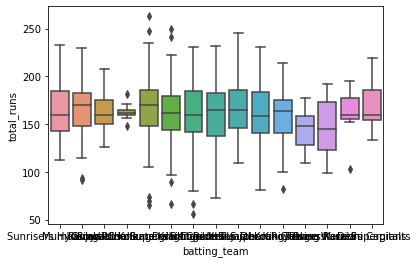

In [77]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

### According to this plot, the batting by CSK & RCB seems best.

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

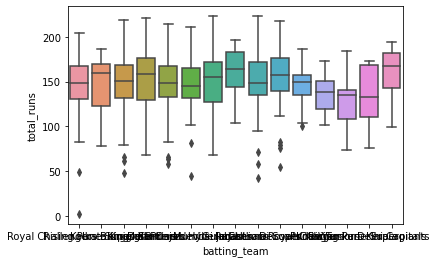

In [12]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

### This figure also conveys the same story.in this, we see a point near 0 for RCB which may seem to be outlier. But it is on account of the match was disrupted.

### How many times teams scores more than 200

In [13]:
high_scores=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172
2,2,1,Mumbai Indians,Rising Pune Supergiant,184
3,2,2,Rising Pune Supergiant,Mumbai Indians,187
4,3,1,Gujarat Lions,Kolkata Knight Riders,183
...,...,...,...,...,...
1523,11413,2,Delhi Capitals,Sunrisers Hyderabad,170
1524,11414,1,Delhi Capitals,Chennai Super Kings,155
1525,11414,2,Chennai Super Kings,Delhi Capitals,162
1526,11415,1,Mumbai Indians,Chennai Super Kings,152


In [14]:
score_200=high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
16,9,1,Delhi Daredevils,Rising Pune Supergiant,205
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213
62,32,1,Sunrisers Hyderabad,Kings XI Punjab,207
72,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209
...,...,...,...,...,...
1475,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,219
1488,11333,1,Royal Challengers Bangalore,Kings XI Punjab,213
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
1499,11338,2,Mumbai Indians,Kolkata Knight Riders,204


<AxesSubplot:xlabel='batting_team', ylabel='count'>

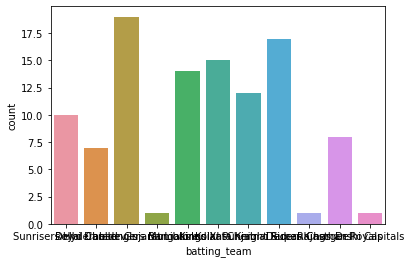

In [15]:
sns.countplot(x=score_200['batting_team'])

<AxesSubplot:xlabel='bowling_team', ylabel='count'>

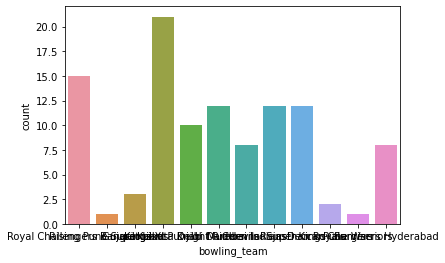

In [16]:
sns.countplot(x=score_200['bowling_team'])

### 1st graph shows the number of times a team has scored above 200 runs.
### 2nd graph shows the number of times a bowling team has conceeded above 200 runs.

## Batsman Comparison

In [17]:
balls=df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [18]:
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [19]:
four=df[df['batsman_runs']==4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179028,11415,2,Chennai Super Kings,Mumbai Indians,12,6,SR Watson,MS Dhoni,RD Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179050,11415,2,Chennai Super Kings,Mumbai Indians,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [20]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
...,...,...
405,YK Pathan,264
406,YV Takawale,26
407,Yashpal Singh,5
408,Yuvraj Singh,218


In [21]:
six=df[df['batsman_runs']==6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178987,11415,2,Chennai Super Kings,Mumbai Indians,6,4,SR Watson,SK Raina,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179048,11415,2,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179061,11415,2,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179062,11415,2,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [22]:
runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Hales,6
4,A Mishra,5
...,...,...
331,Y Venugopal Rao,37
332,YK Pathan,161
333,YV Takawale,3
334,Yuvraj Singh,149


In [23]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
...,...,...,...,...,...
511,YV Takawale,192,183,NaN,NaN
512,Yashpal Singh,47,67,NaN,NaN
513,Younis Khan,3,7,NaN,NaN
514,Yuvraj Singh,2765,2207,NaN,NaN


In [24]:
player.fillna(0,inplace=True)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0
512,Yashpal Singh,47,67,0.0,0.0
513,Younis Khan,3,7,0.0,0.0
514,Yuvraj Singh,2765,2207,0.0,0.0


In [25]:
player['strike_rate']=(player['batsman_runs']/player['ball'])*100
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,6.0,125.000000
4,A Dananjaya,4,5,13.0,5.0,80.000000
...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033
512,Yashpal Singh,47,67,0.0,0.0,70.149254
513,Younis Khan,3,7,0.0,0.0,42.857143
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190


In [26]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,Royal Challengers Bangalore,6
1,1,BCJ Cutting,Sunrisers Hyderabad,16
2,1,CH Gayle,Royal Challengers Bangalore,32
3,1,DA Warner,Sunrisers Hyderabad,14
4,1,DJ Hooda,Sunrisers Hyderabad,16
...,...,...,...,...
11289,11415,RD Chahar,Mumbai Indians,0
11290,11415,RG Sharma,Mumbai Indians,15
11291,11415,SK Raina,Chennai Super Kings,9
11292,11415,SN Thakur,Chennai Super Kings,2


In [27]:
max=grp.groupby(['batsman'])['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Dananjaya,4
...,...,...
511,YV Takawale,45
512,Yashpal Singh,20
513,Younis Khan,3
514,Yuvraj Singh,83


In [28]:
player2=pd.concat([player,max.iloc[:,1:3]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,6.0,125.000000,15
4,A Dananjaya,4,5,13.0,5.0,80.000000,4
...,...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033,45
512,Yashpal Singh,47,67,0.0,0.0,70.149254,20
513,Younis Khan,3,7,0.0,0.0,42.857143,3
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190,83


### Top 10 Batsman

<AxesSubplot:xlabel='batsman'>

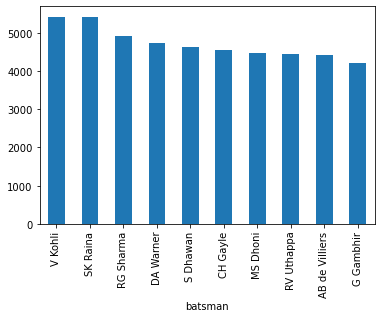

In [29]:
max_runs=df.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.bar()

### SK Raina has highest total runs across all seasons Whereas Virat Kohliis just few runs behind with the second spot

## Top Individual Scores

In [30]:
df.groupby(["match_id","batsman",'batting_team'])["batsman_runs"].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


### Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side

## Highest Wicket Taker

In [31]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [32]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']


In [33]:
hwt=df[df["dismissal_kind"].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


<AxesSubplot:>

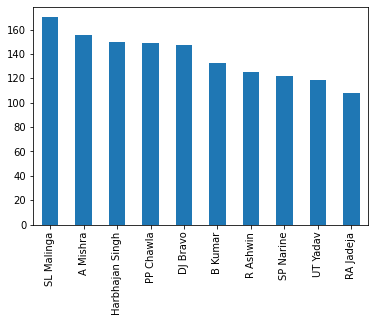

In [34]:
hwt['bowler'].value_counts()[:10].plot.bar()

### SL Malinga leads the chart

## Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv(r'C:\Users\SATISH\Desktop\Indian Premier League\matches.csv')

In [37]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [38]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [39]:
df.shape

(756, 18)

In [40]:
df.drop(['umpire3'],axis=1,inplace=True)

In [41]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS', 'Delhi Capitals':'DCC'}

In [42]:
df['team1']=df['team1'].map(Teams)
df['team2']=df['team2'].map(Teams)

In [43]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,RPS,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


## Some Basic Analysis

In [44]:
df.shape[0]

756

In [45]:
len(df['city'].unique())

33

In [46]:
len(df['team1'].unique())

14

### Most man of the match awards

In [47]:
df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
KV Sharma          1
SB Wagh            1
M Ur Rahman        1
CL White           1
SA Asnodkar        1
Name: player_of_match, Length: 226, dtype: int64

### Maximum win by runs

In [48]:
filter=df['win_by_runs'].max()
df[df['win_by_runs']==filter]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,06-05-2017,MI,DD,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


### Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

## Highest wins by wickets

In [49]:
filter=df['win_by_wickets'].max()
df[df['win_by_wickets']==filter]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,07-04-2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,30-04-2017,DD,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,27-04-2008,MI,DC,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,19-04-2009,KXIP,DD,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,18-03-2010,RR,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,20-05-2011,MI,RR,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,20-05-2012,RR,MI,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,10-04-2013,KXIP,CSK,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,26-04-2015,DD,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,21-04-2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


### Toss Decisions across Seasons

<AxesSubplot:xlabel='season', ylabel='count'>

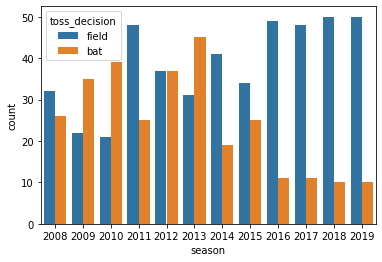

In [50]:
sns.countplot(x='season',hue='toss_decision',data=df)

### In some seasons, the probablity that toss winners opt for batting is high while In 2016, the majority of toss winners opted for fielding

## Maximum Toss Winners

<AxesSubplot:>

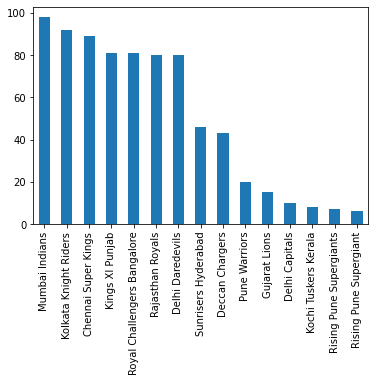

In [51]:
df['toss_winner'].value_counts().plot(kind='bar')

## Total Matches vs Wins for Teams

In [52]:
df.shape

(756, 17)

In [53]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,RPS,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [54]:
df['team2']

0       RCB
1       RPS
2       KKR
3      KXIP
4        DD
       ... 
751      MI
752      MI
753     DCC
754     CSK
755     CSK
Name: team2, Length: 756, dtype: object

In [55]:
matches_played_byteams=pd.concat([df['team1'],df['team2']],axis=1)
matches_played_byteams

,team1,team2
0,SRH,RCB
1,MI,RPS
2,GL,KKR
3,RPS,KXIP
4,RCB,DD
...,...,...
751,KKR,MI
752,CSK,MI
753,SRH,DCC
754,DCC,CSK


In [56]:
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,CSK,164
1,DC,75
2,DCC,16
3,DD,161
4,GL,30
5,KKR,178
6,KTK,14
7,KXIP,176
8,MI,187
9,PW,46


In [57]:
df['winner']=df['winner'].map(Teams)

In [58]:
wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DC,29
9,RPS,15


In [59]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')

In [60]:
player.columns=['team','matches_played','wins']
player

,team,matches_played,wins
0,CSK,164,100
1,DC,75,29
2,DCC,16,10
3,DD,161,67
4,GL,30,13
5,KKR,178,92
6,KTK,14,6
7,KXIP,176,82
8,MI,187,109
9,PW,46,12


In [61]:
player['%win']=(player['wins']/player['matches_played'])*100
player

,team,matches_played,wins,%win
0,CSK,164,100,60.975610
1,DC,75,29,38.666667
2,DCC,16,10,62.500000
3,DD,161,67,41.614907
4,GL,30,13,43.333333
5,KKR,178,92,51.685393
6,KTK,14,6,42.857143
7,KXIP,176,82,46.590909
8,MI,187,109,58.288770
9,PW,46,12,26.086957


## Matches played across each season

<AxesSubplot:xlabel='season', ylabel='count'>

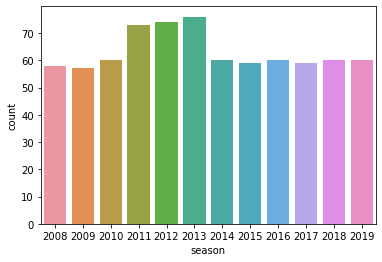

In [62]:
sns.countplot(x=df['season'])

### Runs Across the Seasons

In [63]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,MI,RPS,Rising Pune Supergiant,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,GL,KKR,Kolkata Knight Riders,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,RPS,KXIP,Kings XI Punjab,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [64]:
df2=pd.read_csv(r'C:\Users\SATISH\Desktop\Indian Premier League\deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [65]:
season=df[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN


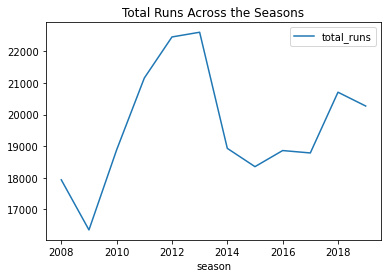

In [66]:
season=season.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot()
plt.title('Total Runs Across the Seasons')
plt.show()

In [67]:
avg_runs=df.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
avg_runs

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [68]:
season

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [69]:
final=pd.concat([avg_runs,season.iloc[:,1]],axis=1)
final

,season,matches,total_runs
0,2008,58,17937
1,2009,57,16353
2,2010,60,18883
3,2011,73,21154
4,2012,74,22453
5,2013,76,22602
6,2014,60,18931
7,2015,59,18353
8,2016,60,18862
9,2017,59,18786


In [70]:
final['per_match_runs']=final['total_runs']/final['matches']
final.set_index('season',inplace=True)

In [71]:
final

,matches,total_runs,per_match_runs
season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


<AxesSubplot:xlabel='season'>

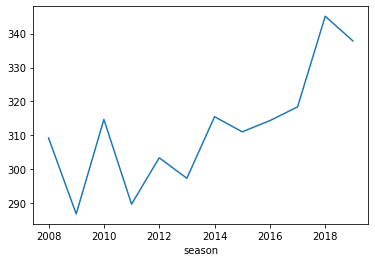

In [72]:
final['per_match_runs'].plot()

## Most lucky grounds for teams

In [73]:
def lucky(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

<AxesSubplot:>

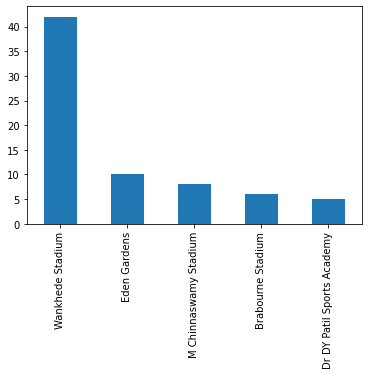

In [74]:
lucky(df,'MI').plot(kind='bar')

### Comparison between 2 teams on the basis of their wins

In [75]:
def comparison(team1,team2):
    compare=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=compare)

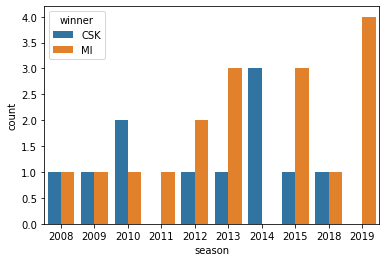

In [76]:
comparison('MI','CSK')

### Here we can see that MI and CSK have played against each other in more than 2 matches, and MI dominates